In [463]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from crea_graphics.colors import primary

For each dataset, taking the largest 10 sectors (sectors as defined in the CEDS data) and combining the rest to 'Other'. Change the number of sectors by adjusting the N_sect parameter.

In [464]:
# read data and aggregate sectors

def read_data_and_aggregate(poll:str, N_sect:int):
    df_in = pd.read_csv(f'../data/input/ceds_sa_{poll}_2022.csv')

    nox_units = df_in.units.unique()
    nox_year = df_in.year.unique()

    # check that pollutant, units, year and country are constant
    assert len(df_in.poll.unique()) == 1, f"Pollutant is not constant: {df_in.pollutant.unique()}"
    assert len(df_in.units.unique()) == 1, f"Units are not constant: {nox_units}"
    assert len(df_in.year.unique()) == 1, f"Year is not constant: {nox_year}"
    assert len(df_in.country.unique()) == 1, f"Country is not constant: {df_in.country.unique()}"

    # print units of the pollutant
    print(f"Units of {poll}: {nox_units[0]}")

    # groupby sector, and take the sum of the emissions
    df_in = df_in.groupby(['sector'], as_index=False).agg({'value': 'sum'})

    # each sector string contains a indicator for sector group, given in []
    # we can use this to group the sectors into groups
    df_in['sector_group'] = df_in.sector.str.extract(r'\[(.*?)\]')[0]

    # create my own groups, to highlight the most important sectors and sub-sectors
    if poll in ['nox', 'so2']:
        df_manual_group = {
            'Electricity autoproducer [1A1a]': 'Electricity production',
            'Electricity public [1A1a]': 'Electricity production',
            '1a1bc other transformation [1A1bc]': 'Fuel production and transformation',
            '1b1 fugitive solid fuels [1B1]': 'Fuel production and transformation',
            '1a3b road [1A3b]': 'Road transport',
            '1a2a ind comb iron steel [1A2a]': 'Industry',
            '1a2b ind comb non ferrous metals [1A2b]': 'Industry',
            '1a2c ind comb chemicals [1A2c]': 'Industry',
            '1a2d ind comb pulp paper [1A2d]': 'Industry',
            '1a2e ind comb food tobacco [1A2e]': 'Industry',
            '1a2f ind comb non metalic minerals [1A2f]': 'Industry',
            '1a2g ind comb construction [1A2g]': 'Industry',
            '1a2g ind comb transpequip [1A2g]': 'Industry',
            '1a2g ind comb machinery [1A2g]': 'Industry',
            '1a2g ind comb mining quarying [1A2g]': 'Industry',
            '1a2g ind comb wood products [1A2g]' : 'Industry',
            '1a2g ind comb textile leather [1A2g]' : 'Industry',
            '1a2g ind comb other [1A2g]': 'Industry',
            '1a5 other unspecified [1A5]': 'Industry',
            '2a1 cement production [2A1]': 'Industry',
            '2a2 lime production [2A2]' : 'Industry',
            '2b chemical industry [2B]': 'Industry',
            '2h pulp and paper food beverage wood [2H]': 'Industry',
            '6a other in total [6A]': 'Industry',
        }

    # for so2, drop road transport
    if poll == 'so2':
        df_manual_group.pop('1a3b road [1A3b]', None)

    # add the manual groups to the dataframe
    df_in['manual_group'] = df_in['sector'].replace(df_manual_group)
    # for all other sectors, label 'Others'
    df_in.loc[~df_in['manual_group'].isin(df_manual_group.values()), 'manual_group'] = 'Others'

    # take the N largest sectors, and sum the rest to 'other'
    df_in = df_in.sort_values('value', ascending=False)
    # set the index to be the sector
    df_in = df_in.set_index('sector')

    # take the N largest sectors
    other = df_in.iloc[N_sect:, :].sum()
    other['sector_group'] = 'Others'
    other['manual_group'] = 'Others'

    df_agg = df_in.iloc[:N_sect, :].copy()
    df_agg.loc['Others'] = other

    df_agg = df_agg.reset_index()

    return df_agg


df_nox = read_data_and_aggregate('nox', N_sect=20)
df_so2 = read_data_and_aggregate('so2', N_sect=10)

df_nox = df_nox.rename(columns={'value': 'emissions'})
df_so2 = df_so2.rename(columns={'value': 'emissions'})


Units of nox: ktNO2
Units of so2: ktSO2


## Make figures

In [465]:
sns.set(style="whitegrid")
# set context to 'notebook'
sns.set_context("notebook")

# set default palette to primary
sns.set_palette(primary.colors)

### NOx emissions

/tmp/ipykernel_18629/940902967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x='sector', y='emissions', data=df_nox.groupby('sector').sum(), palette=list(primary.colors))
/tmp/ipykernel_18629/940902967.py:4: UserWarning: 
The palette list has fewer values (7) than needed (21) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot( x='sector', y='emissions', data=df_nox.groupby('sector').sum(), palette=list(primary.colors))


Text(0.5, 0, 'Sector')

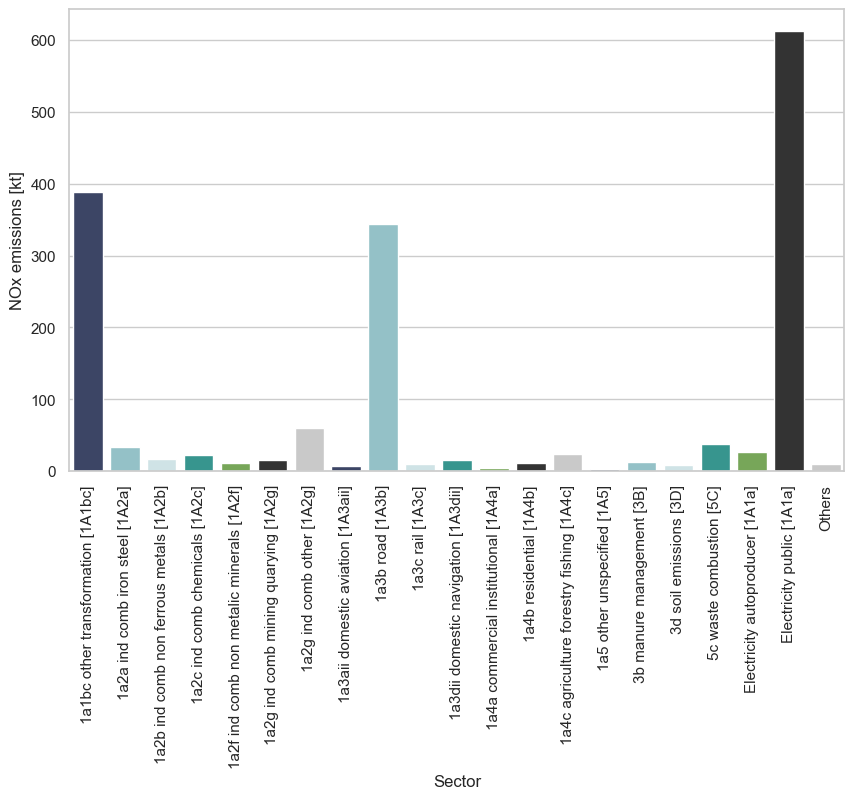

In [466]:
# plot only NOx
plt.figure(figsize=(10, 6))
# make a stacked bar plot
ax = sns.barplot( x='sector', y='emissions', data=df_nox.groupby('sector').sum(), palette=list(primary.colors))
# rotate x labels
a = plt.xticks(rotation=90)
# set y-axis label 
ax.set_ylabel('NOx emissions [kt]')
# set x-axis label
ax.set_xlabel('Sector')

/tmp/ipykernel_18629/4179536685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x='sector_group', y='emissions', data=df_nox.groupby('sector_group').sum(), palette=list(primary.colors))
/tmp/ipykernel_18629/4179536685.py:4: UserWarning: 
The palette list has fewer values (7) than needed (19) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot( x='sector_group', y='emissions', data=df_nox.groupby('sector_group').sum(), palette=list(primary.colors))


Text(0.5, 0, 'Sector group')

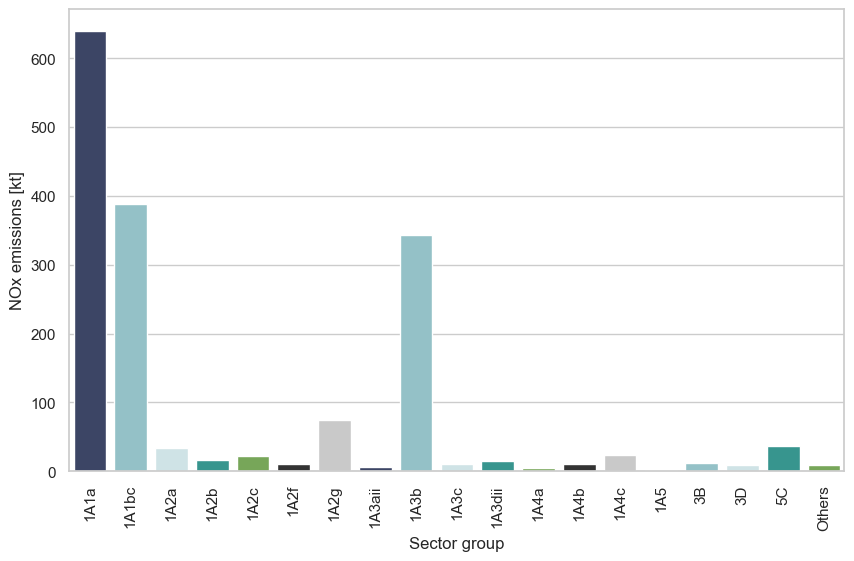

In [467]:
# plot only NOx
plt.figure(figsize=(10, 6))
# make a stacked bar plot
ax = sns.barplot( x='sector_group', y='emissions', data=df_nox.groupby('sector_group').sum(), palette=list(primary.colors))
# rotate x labels
a = plt.xticks(rotation=90)
# set y-axis label 
ax.set_ylabel('NOx emissions [kt]')
# set x-axis label
ax.set_xlabel('Sector group')

Selected sectors to create simple combined categories:
 - Electricity production includes 'Electricity public [1A1a]' and 'Electricity autoproducer [1A1a]'
 - Fuel production includes '1a1bc other transformation [1A1bc]' and '1b1 fugitive solid fuels [1B1]'
 - Road transport includes '1a3b road [1A3b]'
 - Industry includes all the sectors listed under 'Industry (IND)' in Table 2 in https://doi.org/10.5194/essd-12-3413-2020
 - Other: all the rest

/tmp/ipykernel_18629/1850117772.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x='manual_group',
/tmp/ipykernel_18629/1850117772.py:4: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  ax = sns.barplot( x='manual_group',


Text(0.5, 1.0, 'South Africa NOx emissions for year 2022 (CEDS)')

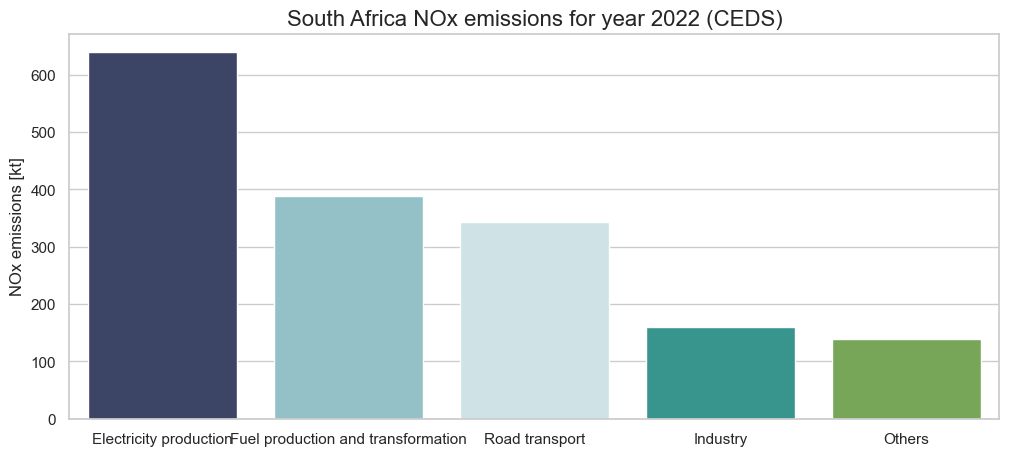

In [477]:
# plot only NOx
plt.figure(figsize=(12, 5))
# make a stacked bar plot
ax = sns.barplot( x='manual_group', 
                 y='emissions', 
                 data=df_nox.groupby('manual_group').sum().sort_values('emissions', ascending=False).reset_index(),
                 palette=list(primary.colors))
# rotate x labels
a = plt.xticks(rotation=0)
# set y-axis label 
ax.set_ylabel('NOx emissions [kt]')
# set x-axis label
ax.set_xlabel('')
# Add title
ax.set_title('South Africa NOx emissions for year 2022 (CEDS)', fontsize=16)

### SO2

/tmp/ipykernel_18629/3902076817.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x='sector', y='emissions', data=df_so2.groupby('sector').sum(), palette=list(primary.colors))
/tmp/ipykernel_18629/3902076817.py:4: UserWarning: 
The palette list has fewer values (7) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot( x='sector', y='emissions', data=df_so2.groupby('sector').sum(), palette=list(primary.colors))


Text(0.5, 0, 'Sector')

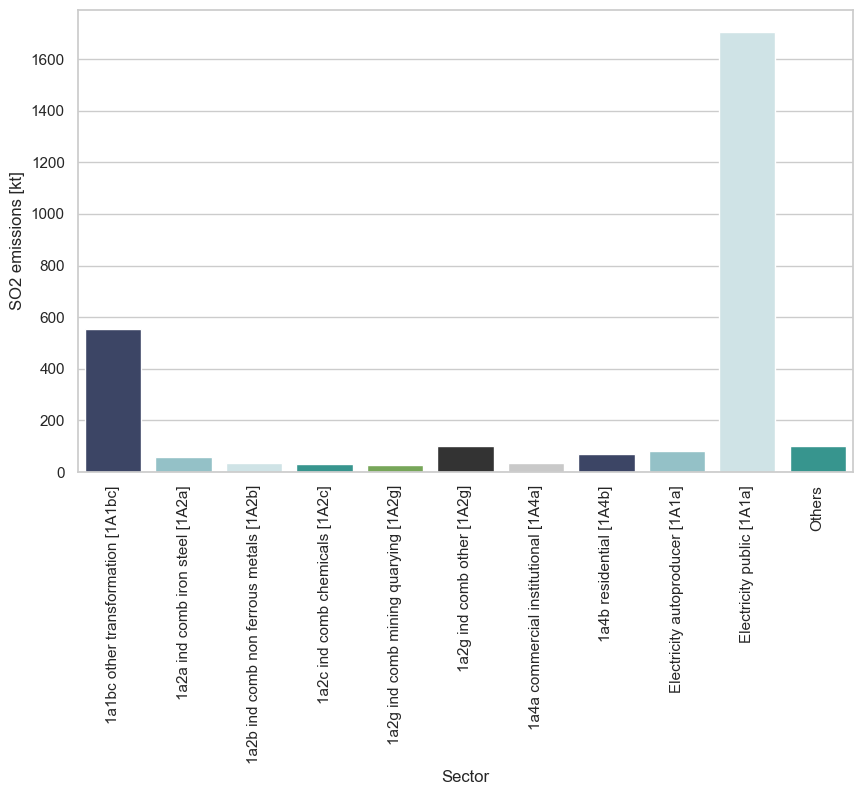

In [469]:
# plot only SO2
plt.figure(figsize=(10, 6))
# make a stacked bar plot
ax = sns.barplot( x='sector', y='emissions', data=df_so2.groupby('sector').sum(), palette=list(primary.colors))
# rotate x labels
a = plt.xticks(rotation=90)
# set y-axis label 
ax.set_ylabel('SO2 emissions [kt]')
# set x-axis label
ax.set_xlabel('Sector')

Sector groups for SO2 same as for NOx, except road transport also included in 'Other'.

/tmp/ipykernel_18629/1479415763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( x='manual_group', y='emissions', data=df_so2.groupby('manual_group').sum(), palette=list(primary.colors))
/tmp/ipykernel_18629/1479415763.py:4: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.barplot( x='manual_group', y='emissions', data=df_so2.groupby('manual_group').sum(), palette=list(primary.colors))


Text(0.5, 1.0, 'South Africa SO2 emissions for year 2022 (CEDS)')

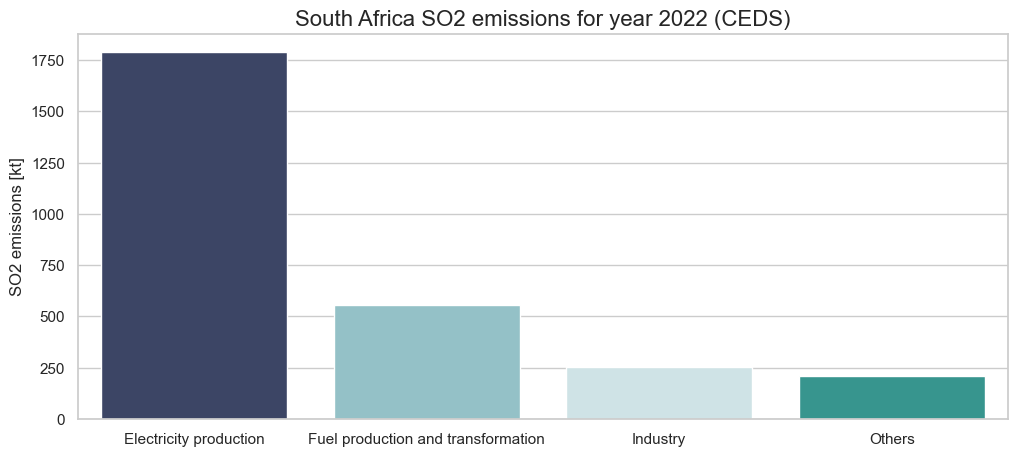

In [470]:
# plot SO2 groups
plt.figure(figsize=(12, 5))
# make a stacked bar plot
ax = sns.barplot( x='manual_group', y='emissions', data=df_so2.groupby('manual_group').sum(), palette=list(primary.colors))
# rotate x labels
a = plt.xticks(rotation=0)
# set y-axis label 
ax.set_ylabel('SO2 emissions [kt]')
# set x-axis label
ax.set_xlabel('')
# Add title
ax.set_title('South Africa SO2 emissions for year 2022 (CEDS)', fontsize=16)

### Combined figure

In [471]:

df_nox['poll'] = 'NOx'
df_so2['poll'] = 'SO2'

df_all = pd.concat([df_nox, df_so2], axis=0)

df_all = df_all.groupby(['poll', 'manual_group']).agg({'emissions': 'sum'}).reset_index()

# calculate percentage for each sector
df_all['emissions'] = df_all['emissions'] / df_all.groupby('poll')['emissions'].transform('sum') * 100

# sort the rows by poll and emissions
df_all = df_all.sort_values(['poll', 'emissions'], ascending=[True, False])

# # checking that sectors sum to 100%
# df_all.groupby('poll')['emissions'].sum()

(0.0, 100.0)

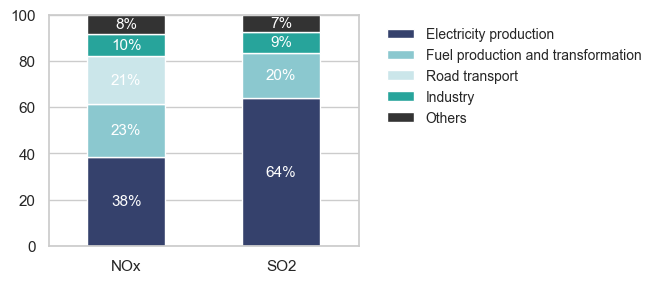

In [476]:
fig, ax = plt.subplots(figsize=(4, 3))

pivot_df = df_all.pivot_table(index='poll', columns='manual_group', values='emissions', fill_value=0)

# set column order in pivot_df to follow the order in df_all
pivot_df = pivot_df.reindex(columns=df_all['manual_group'].unique())

pivot_df.plot(
    kind='bar',
    stacked=True,
    color=[primary.colors[0], primary.colors[1], primary.colors[2], primary.colors[3], primary.colors[-2]],
    ax=ax
)

for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.0f}%',
                ha='center', va='center', fontsize=11, color='white'
            )

# move legend outside of the plot
ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, fontsize=10)

# set rotation of x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# hide x-axis label
ax.set_xlabel('')
ax.set_ylim([0, 100])